In [12]:
import hw_utils_package as hw
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression



INFO:hw_utils_package.fetchData:Fetching file by url on 2025-03-06 Time 19:50:28+00:00 UTC


(7352, 563)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING


In [ ]:

df = hw.fromKaggelhubCSV("uciml/human-activity-recognition-with-smartphones", "train.csv")
print(df.shape)
df.head(3)

In [54]:

print('We have {} NaN/Null values in df'.format(df.isnull().values.sum())) 
print('Duplicates in df : {}'.format(sum(df.duplicated())))# число дубликатов строк

We have 0 NaN/Null values in df
Duplicates in df : 0


In [55]:
print(df.shape)
columns = df.columns
columns = columns.str.replace('(','')
columns = columns.str.replace(')','')
columns = columns.str.replace('-', '')
columns = columns.str.replace(',','')
print(columns)
df.columns= columns
df.groupby(['subject', 'Activity']).size()

(7352, 563)
Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)


subject  Activity          
1        LAYING                50
         SITTING               47
         STANDING              53
         WALKING               95
         WALKING_DOWNSTAIRS    49
                               ..
30       SITTING               62
         STANDING              59
         WALKING               65
         WALKING_DOWNSTAIRS    62
         WALKING_UPSTAIRS      65
Length: 126, dtype: int64

In [56]:
df.groupby(['subject']).size()

subject
1     347
3     341
5     302
6     325
7     308
8     281
11    316
14    323
15    328
16    366
17    368
19    360
21    408
22    321
23    372
25    409
26    392
27    376
28    382
29    344
30    383
dtype: int64

<Axes: xlabel='subject'>

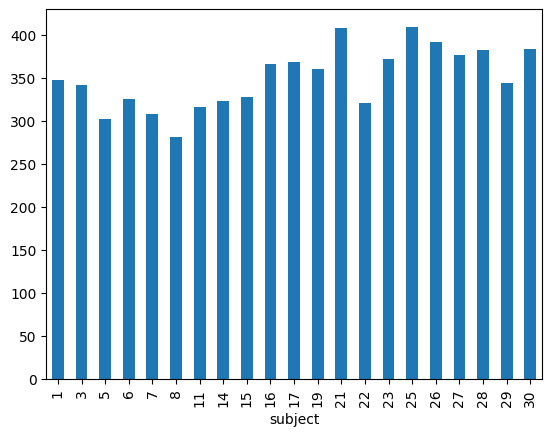

In [57]:
df.groupby(['subject']).size().plot(kind = "bar")

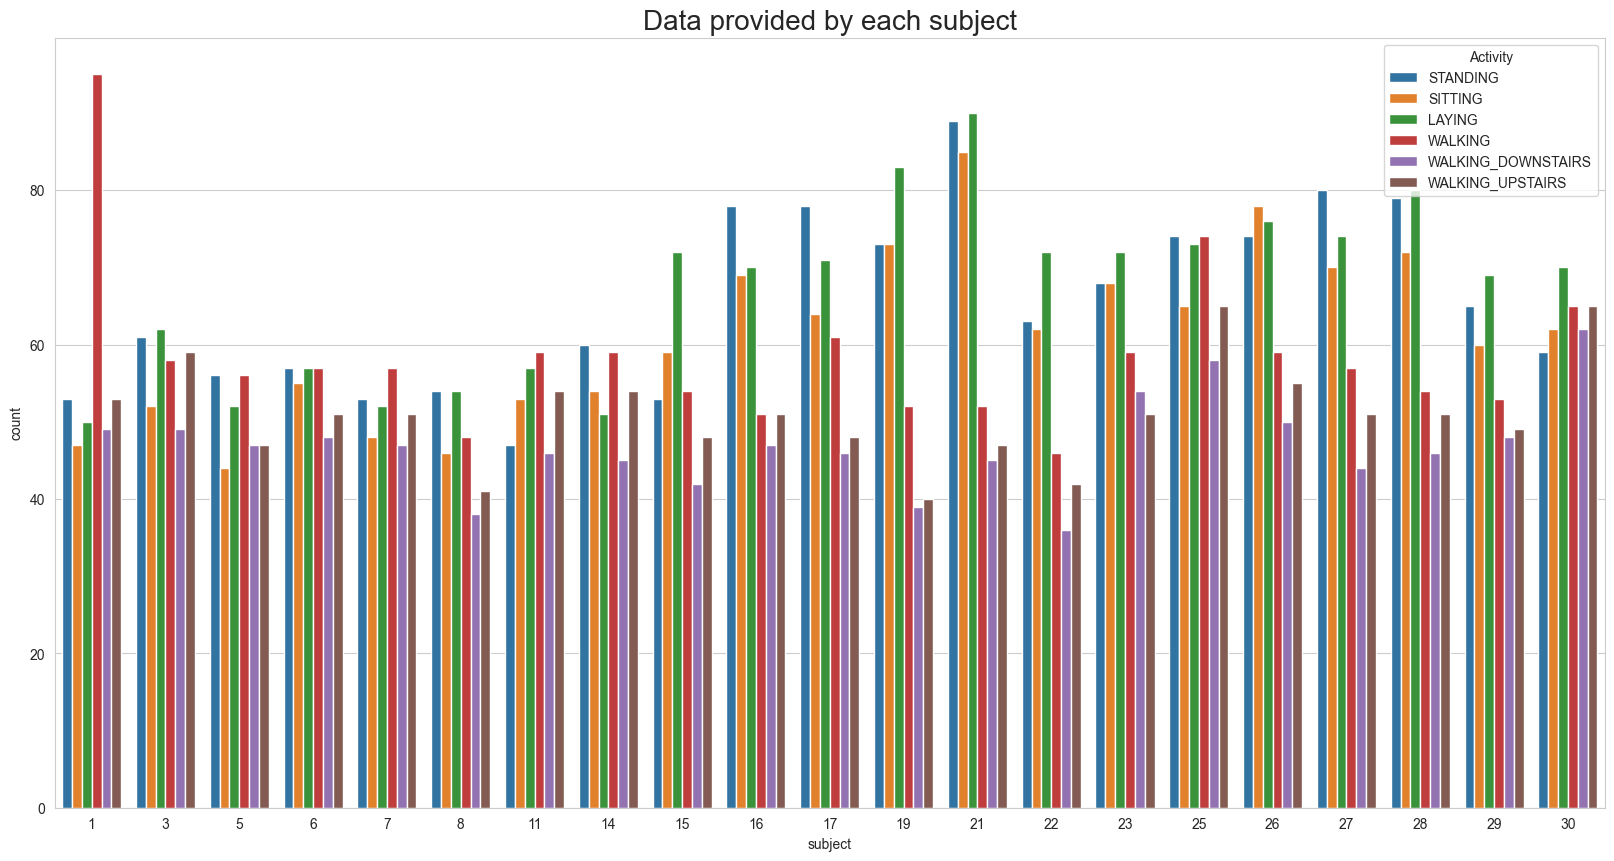

In [6]:
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(20,10))
plt.title('Data provided by each subject', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = df)
plt.show()

In [12]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
    label_encoders[column] = le


['Activity' 'tBodyAcc-mean()-X' 'tBodyAcc-mean()-Y' 'tBodyAcc-mean()-Z'
 'tBodyAcc-std()-X' 'tBodyAcc-std()-Y' 'tBodyAcc-std()-Z'
 'tBodyAcc-mad()-X' 'tBodyAcc-mad()-Y' 'tBodyAcc-mad()-Z'
 'tBodyAcc-max()-X' 'tBodyAcc-max()-Y' 'tBodyAcc-max()-Z'
 'tBodyAcc-min()-X' 'tBodyAcc-min()-Y' 'tBodyAcc-min()-Z' 'tBodyAcc-sma()'
 'tBodyAcc-energy()-X' 'tBodyAcc-energy()-Y' 'tBodyAcc-energy()-Z'
 'tBodyAcc-iqr()-X']


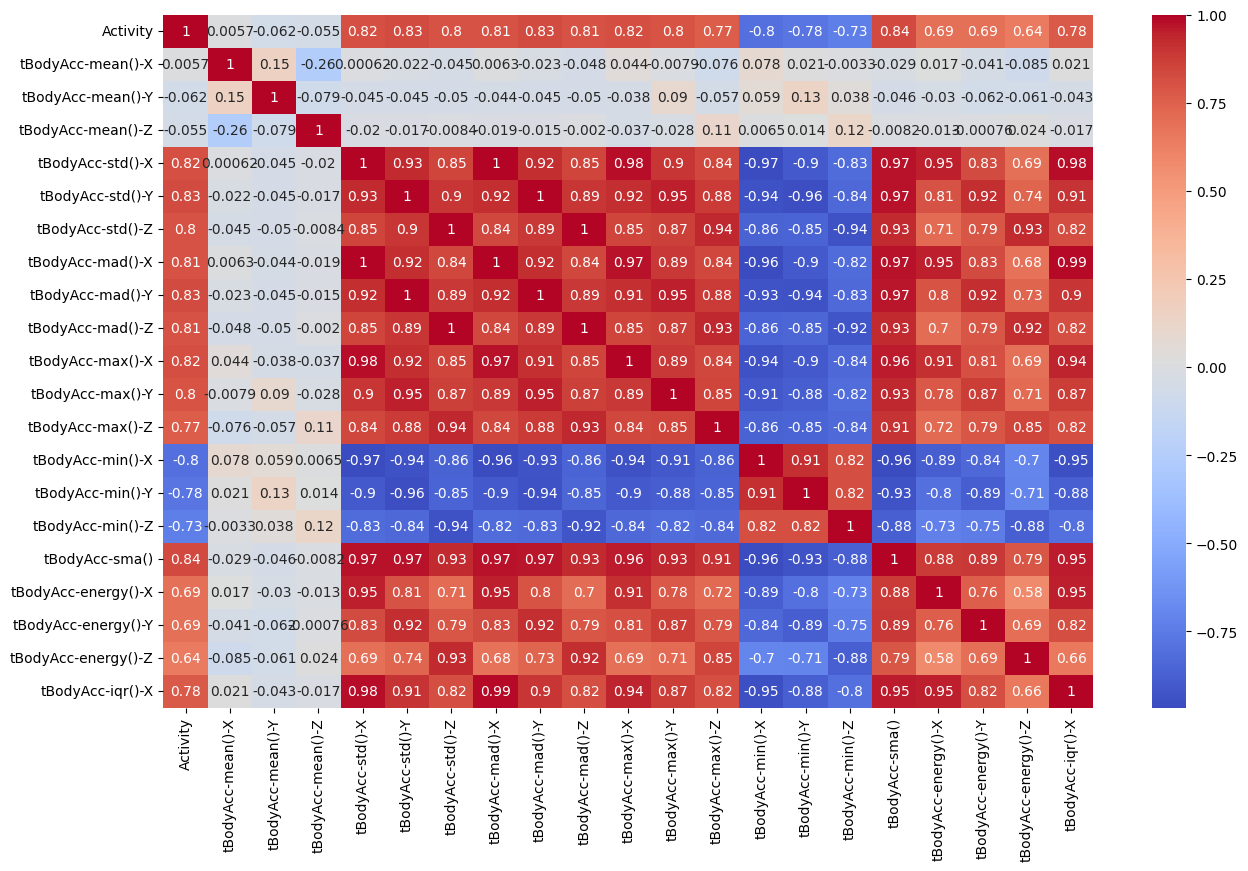

In [13]:
#df.info()
#print(df[:10])

import pandas as pd
def plotting_hms(df:pd.DataFrame, cFrom, cTo):
    columns_range = df.columns[cFrom:cTo]
    custom = ['Activity']
    corr_columns_name = np.concatenate([custom, columns_range])
    print(corr_columns_name)
    sub_df = df[corr_columns_name]
    hw.plotting_heatmap(sub_df)
    None
    
for i in range(1):
    plotting_hms(df, i*20, i*20+20)
    

In [41]:
X = df.drop(['subject', 'Activity'], axis=1)
y = df['Activity']
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )

In [15]:
# Оберточный метод (Wrapper Method) - RFE с GridSearch
# Установим параметры для Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


In [19]:
# Создаем модель случайного леса
model = RandomForestClassifier(random_state=42)



In [22]:
# Выполняем GridSearch
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [59]:
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

Лучшие параметры: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


In [60]:
best_model = RandomForestClassifier(**best_params, random_state=42)

In [62]:
# Используем RFE для выбора признаков
selector = RFE(estimator=best_model, n_features_to_select=10)  # выбираем 10 признаков
selector.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(min_samples_split=5, n_estimators=50,
                                     random_state=42),
    n_features_to_select=10)

In [63]:
# Получаем выбранные признаки
selected_features_rfe = X_train.columns[selector.support_]
print("Выбранные признаки (RFE):", selected_features_rfe)

Выбранные признаки (RFE): Index(['tBodyAccmaxX', 'tGravityAccmeanX', 'tGravityAccmeanY',
       'tGravityAccminX', 'tGravityAccminY', 'tGravityAccenergyX',
       'tGravityAccarCoeffY1', 'tBodyAccJerksma', 'fBodyAccbandsEnergy124',
       'fBodyAccJerkbandsEnergy18'],
      dtype='object')


In [64]:
X_train_rfe = X_train[selected_features_rfe]
X_test_rfe = X_test[selected_features_rfe]

best_model.fit(X_train_rfe, y_train)
y_pred_rfe = best_model.predict(X_test_rfe)
# Выводим отчет о классификации
print("Отчет о классификации для признаков RFE:")
print(classification_report(y_test, y_pred_rfe))



Отчет о классификации для признаков RFE:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       422
           1       0.94      0.91      0.92       386
           2       0.92      0.95      0.93       412
           3       0.98      0.97      0.97       368
           4       0.95      0.97      0.96       296
           5       0.98      0.96      0.97       322

    accuracy                           0.96      2206
   macro avg       0.96      0.96      0.96      2206
weighted avg       0.96      0.96      0.96      2206



In [65]:
# Нормализация данных
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train_rfe)
X_test_normalized = scaler.transform(X_test_rfe)

In [74]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_normalized, y_train)
y_pred_logistic = logistic_model.predict(X_test_normalized)
print("Логистическая регрессия:")
print(classification_report(y_test, y_pred_logistic))
print("Точность:", accuracy_score(y_test, y_pred_logistic))

Логистическая регрессия:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       422
           1       0.87      0.81      0.84       386
           2       0.83      0.89      0.86       412
           3       0.93      0.95      0.94       368
           4       0.89      0.89      0.89       296
           5       0.92      0.90      0.91       322

    accuracy                           0.91      2206
   macro avg       0.91      0.91      0.91      2206
weighted avg       0.91      0.91      0.91      2206

Точность: 0.9079782411604714


In [76]:
print(confusion_matrix(y_test,  y_pred_logistic))


[[422   0   0   0   0   0]
 [  0 312  73   0   0   1]
 [  0  47 365   0   0   0]
 [  0   0   0 351   8   9]
 [  0   0   0  16 264  16]
 [  0   0   0  10  23 289]]


In [84]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier


In [77]:

svm_model = SVC(random_state=42)
svm_model.fit(X_train_normalized, y_train)
y_pred_svm = svm_model.predict(X_test_normalized)
print("Метод опорных векторов (SVM):")
print(classification_report(y_test, y_pred_svm))
print("Точность:", accuracy_score(y_test, y_pred_svm))

Метод опорных векторов (SVM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       422
           1       0.87      0.81      0.84       386
           2       0.83      0.89      0.86       412
           3       0.94      0.97      0.95       368
           4       0.94      0.91      0.92       296
           5       0.94      0.93      0.94       322

    accuracy                           0.92      2206
   macro avg       0.92      0.92      0.92      2206
weighted avg       0.92      0.92      0.92      2206

Точность: 0.9188576609247506


In [78]:
print(confusion_matrix(y_test,  y_pred_svm))

[[422   0   0   0   0   0]
 [  0 312  74   0   0   0]
 [  0  45 367   0   0   0]
 [  0   0   0 357   5   6]
 [  0   0   0  14 268  14]
 [  0   0   0  10  11 301]]


In [79]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_normalized, y_train)
y_pred_knn = knn_model.predict(X_test_normalized)
print("Метод k-ближайших соседей (KNN):")
print(classification_report(y_test, y_pred_knn))
print("Точность:", accuracy_score(y_test, y_pred_knn))

Метод k-ближайших соседей (KNN):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       422
           1       0.89      0.86      0.87       386
           2       0.87      0.90      0.88       412
           3       0.93      0.98      0.95       368
           4       0.95      0.93      0.94       296
           5       0.97      0.94      0.96       322

    accuracy                           0.93      2206
   macro avg       0.94      0.93      0.93      2206
weighted avg       0.93      0.93      0.93      2206

Точность: 0.9338168631006346


In [80]:
print(confusion_matrix(y_test,  y_pred_knn))

[[422   0   0   0   0   0]
 [  0 332  54   0   0   0]
 [  0  43 369   0   0   0]
 [  0   0   0 359   8   1]
 [  0   0   0  14 275   7]
 [  0   0   0  11   8 303]]


In [89]:
gb_model = GradientBoostingClassifier(n_estimators=50, max_depth=3, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_rfe, y_train) 
y_pred_gb = gb_model.predict(X_test_rfe)
print("Градиентный бустинг:")
print(classification_report(y_test, y_pred_gb))
print("Точность:", accuracy_score(y_test, y_pred_gb))


Градиентный бустинг:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       422
           1       0.91      0.87      0.89       386
           2       0.88      0.92      0.90       412
           3       0.97      0.98      0.97       368
           4       0.96      0.96      0.96       296
           5       0.98      0.96      0.97       322

    accuracy                           0.95      2206
   macro avg       0.95      0.95      0.95      2206
weighted avg       0.95      0.95      0.95      2206

Точность: 0.9487760652765186


In [90]:
gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_rfe, y_train) 
y_pred_gb = gb_model.predict(X_test_rfe)
print("Градиентный бустинг:")
print(classification_report(y_test, y_pred_gb))
print("Точность:", accuracy_score(y_test, y_pred_gb))


Градиентный бустинг:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       422
           1       0.92      0.88      0.90       386
           2       0.89      0.93      0.91       412
           3       0.98      0.99      0.98       368
           4       0.97      0.97      0.97       296
           5       0.98      0.97      0.97       322

    accuracy                           0.95      2206
   macro avg       0.96      0.95      0.95      2206
weighted avg       0.95      0.95      0.95      2206

Точность: 0.9533091568449683


In [101]:
gb_model = GradientBoostingClassifier(n_estimators=150, max_depth=3, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_rfe, y_train) 
y_pred_gb = gb_model.predict(X_test_rfe)
print("Градиентный бустинг:")
print(classification_report(y_test, y_pred_gb))
print("Точность:", accuracy_score(y_test, y_pred_gb))


Градиентный бустинг:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       422
           1       0.92      0.88      0.90       386
           2       0.89      0.93      0.91       412
           3       0.98      0.99      0.98       368
           4       0.97      0.97      0.97       296
           5       0.98      0.98      0.98       322

    accuracy                           0.96      2206
   macro avg       0.96      0.96      0.96      2206
weighted avg       0.96      0.96      0.96      2206

Точность: 0.9555757026291931


In [100]:
gb_model = GradientBoostingClassifier(n_estimators=150, max_depth=3, learning_rate=0.2, random_state=42)
gb_model.fit(X_train_rfe, y_train) 
y_pred_gb = gb_model.predict(X_test_rfe)
print("Градиентный бустинг:")
print(classification_report(y_test, y_pred_gb))
print("Точность:", accuracy_score(y_test, y_pred_gb))


Градиентный бустинг:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       422
           1       0.92      0.88      0.90       386
           2       0.90      0.93      0.91       412
           3       0.98      0.98      0.98       368
           4       0.97      0.98      0.97       296
           5       0.99      0.98      0.98       322

    accuracy                           0.96      2206
   macro avg       0.96      0.96      0.96      2206
weighted avg       0.96      0.96      0.96      2206

Точность: 0.958295557570263


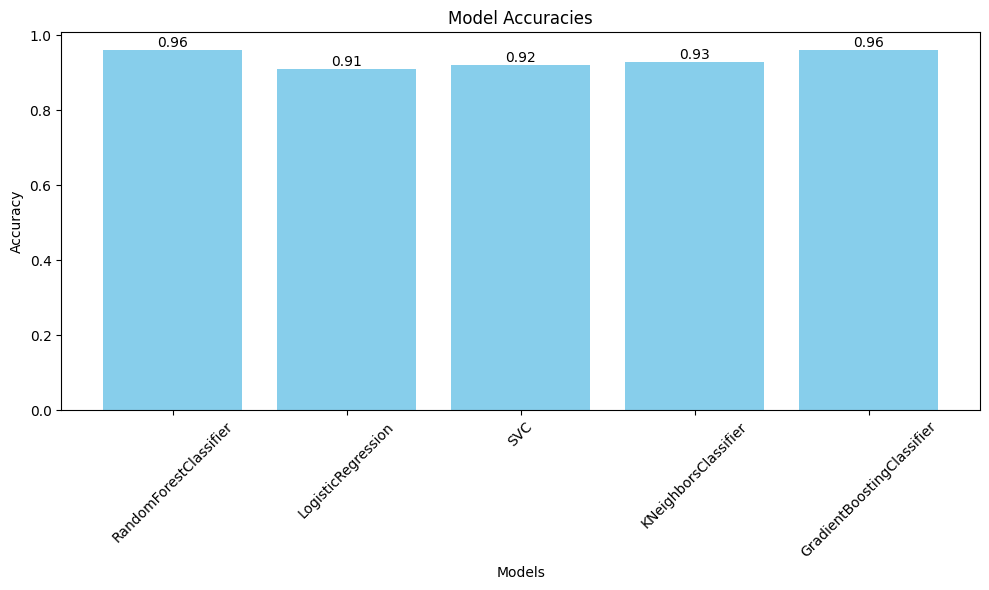

In [2]:
import hw_utils_package as hwu

models = [
    "RandomForestClassifier",
    "LogisticRegression",
    "SVC",
     "KNeighborsClassifier",
    "GradientBoostingClassifier"
]
accuracies = [0.96, 0.91, 0.92, 0.93, 0.96]  # Model Accuracies
# Call the plotting function
hwu.plotting_charts.plot_bar_chart(accuracies, models, title='Model Accuracies', xlabel='Models', ylabel='Accuracy')
 
       
